### Importação dos dados

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# URLs dos arquivos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Leitura e nomeação das lojas
loja1 = pd.read_csv(url1)
loja1['loja'] = 'Loja 1'

loja2 = pd.read_csv(url2)
loja2['loja'] = 'Loja 2'

loja3 = pd.read_csv(url3)
loja3['loja'] = 'Loja 3'

loja4 = pd.read_csv(url4)
loja4['loja'] = 'Loja 4'

# Lista das lojas para reutilizar
lojas = [loja1, loja2, loja3, loja4]

# Paleta de cores
cores = ["#A0DD16", "#9400D4", "#Ff1494", "#F8B8AF"]

# 1. Análise do faturamento

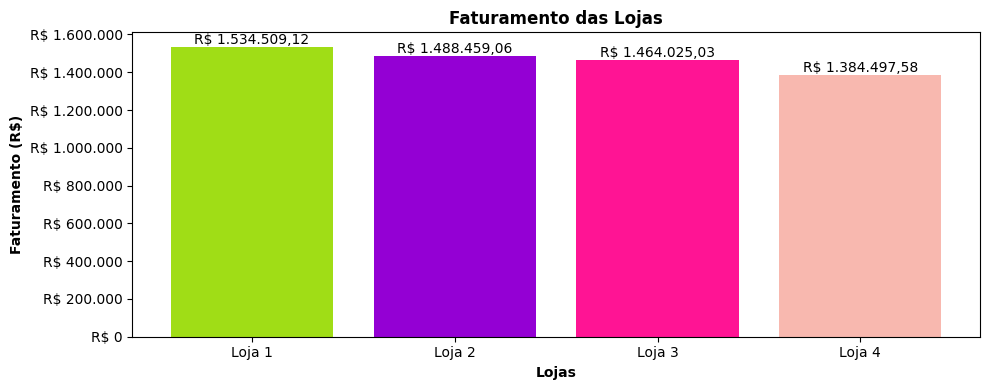

In [ ]:
# Cálculo do faturamento por loja
faturamentos = [loja['Preço'].sum() for loja in lojas]
nomes_lojas = [loja['loja'].iloc[0] for loja in lojas]

# Gráfico de faturamento
fig, ax = plt.subplots(figsize=(10, 4))
barras = ax.bar(nomes_lojas, faturamentos, color=cores)

# Formatação da moeda em real - R$
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

# Título e rótulos
ax.set_title('Faturamento das Lojas', fontweight='bold')
ax.set_xlabel('Lojas', fontweight='bold')
ax.set_ylabel('Faturamento (R$)', fontweight='bold')

# Labels nas barras
labels = [f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for x in faturamentos]
ax.bar_label(barras, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria

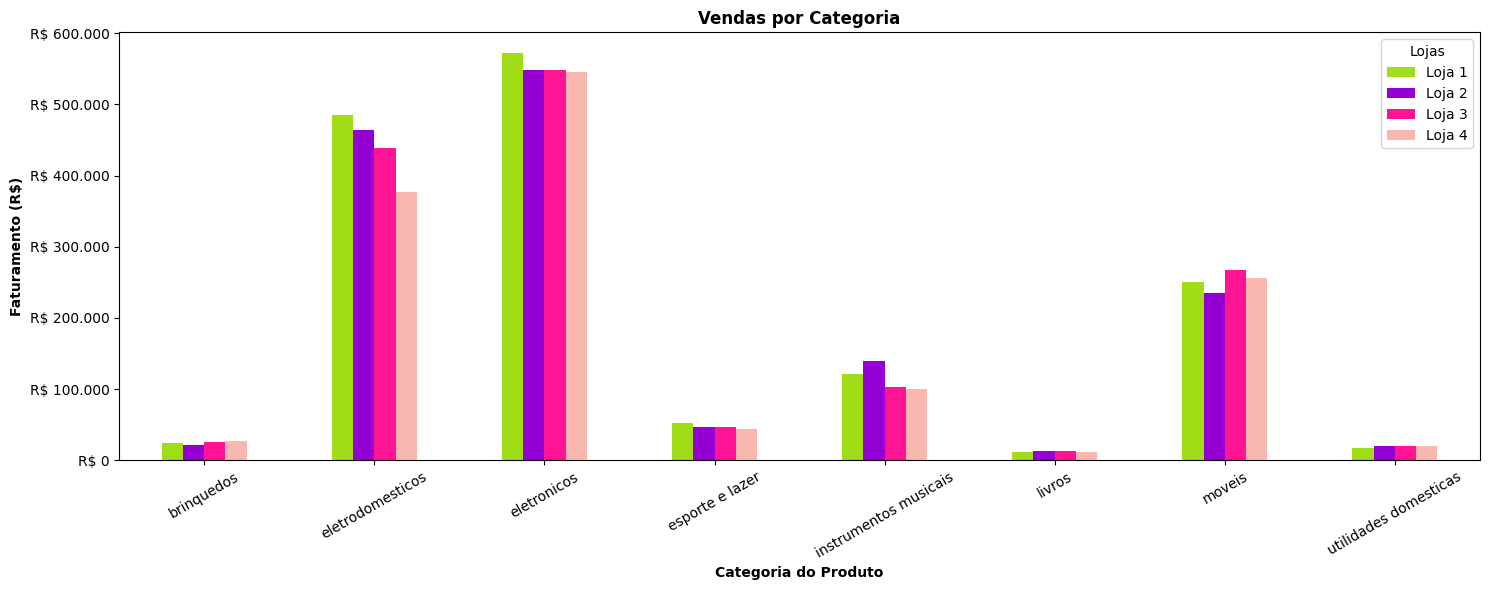

In [3]:

# Agrupamento por categoria
vendas_cat = pd.DataFrame({
    "Loja 1": loja1.groupby('Categoria do Produto')['Preço'].sum(),
    "Loja 2": loja2.groupby('Categoria do Produto')['Preço'].sum(),
    "Loja 3": loja3.groupby('Categoria do Produto')['Preço'].sum(),
    "Loja 4": loja4.groupby('Categoria do Produto')['Preço'].sum()
}).fillna(0)

# Gráfico de barras agrupadas
ax = vendas_cat.plot(kind="bar", figsize=(15, 6), rot=30, color=cores)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))
plt.title("Vendas por Categoria", fontweight='bold')
plt.xlabel("Categoria do Produto", fontweight='bold')
plt.ylabel("Faturamento (R$)", fontweight='bold')
plt.legend(title='Lojas', loc='upper right')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

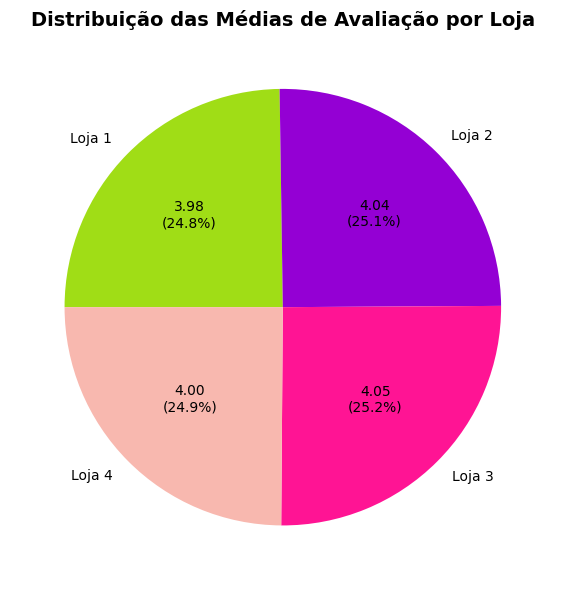

In [ ]:
# Cálculo da média de avaliação por loja
avaliacoes_dict = {loja['loja'].iloc[0]: loja['Avaliação da compra'].mean() for loja in lojas}

# Inverter a posição de Loja 2 com Loja 3 fazendo o sentido horário
ordem_desejada = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = pd.Series(avaliacoes_dict)[ordem_desejada]

# Cores na ordem correspondente
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores = ["#A0DD16", "#9400D4", "#Ff1494", "#F8B8AF"]
cores_avaliacao = [cores[nomes_lojas.index(nome)] for nome in ordem_desejada]

# Função com quebra de linha
def func_autopct(pct):
    total = avaliacoes.sum()
    valor = pct * total / 100
    return f'{valor:.2f}\n({pct:.1f}%)'

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
avaliacoes.plot(
    kind='pie',
    autopct=func_autopct,
    colors=cores_avaliacao,
    startangle=180,
    counterclock=False,
    ylabel=''
)

plt.title('Distribuição das Médias de Avaliação por Loja', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

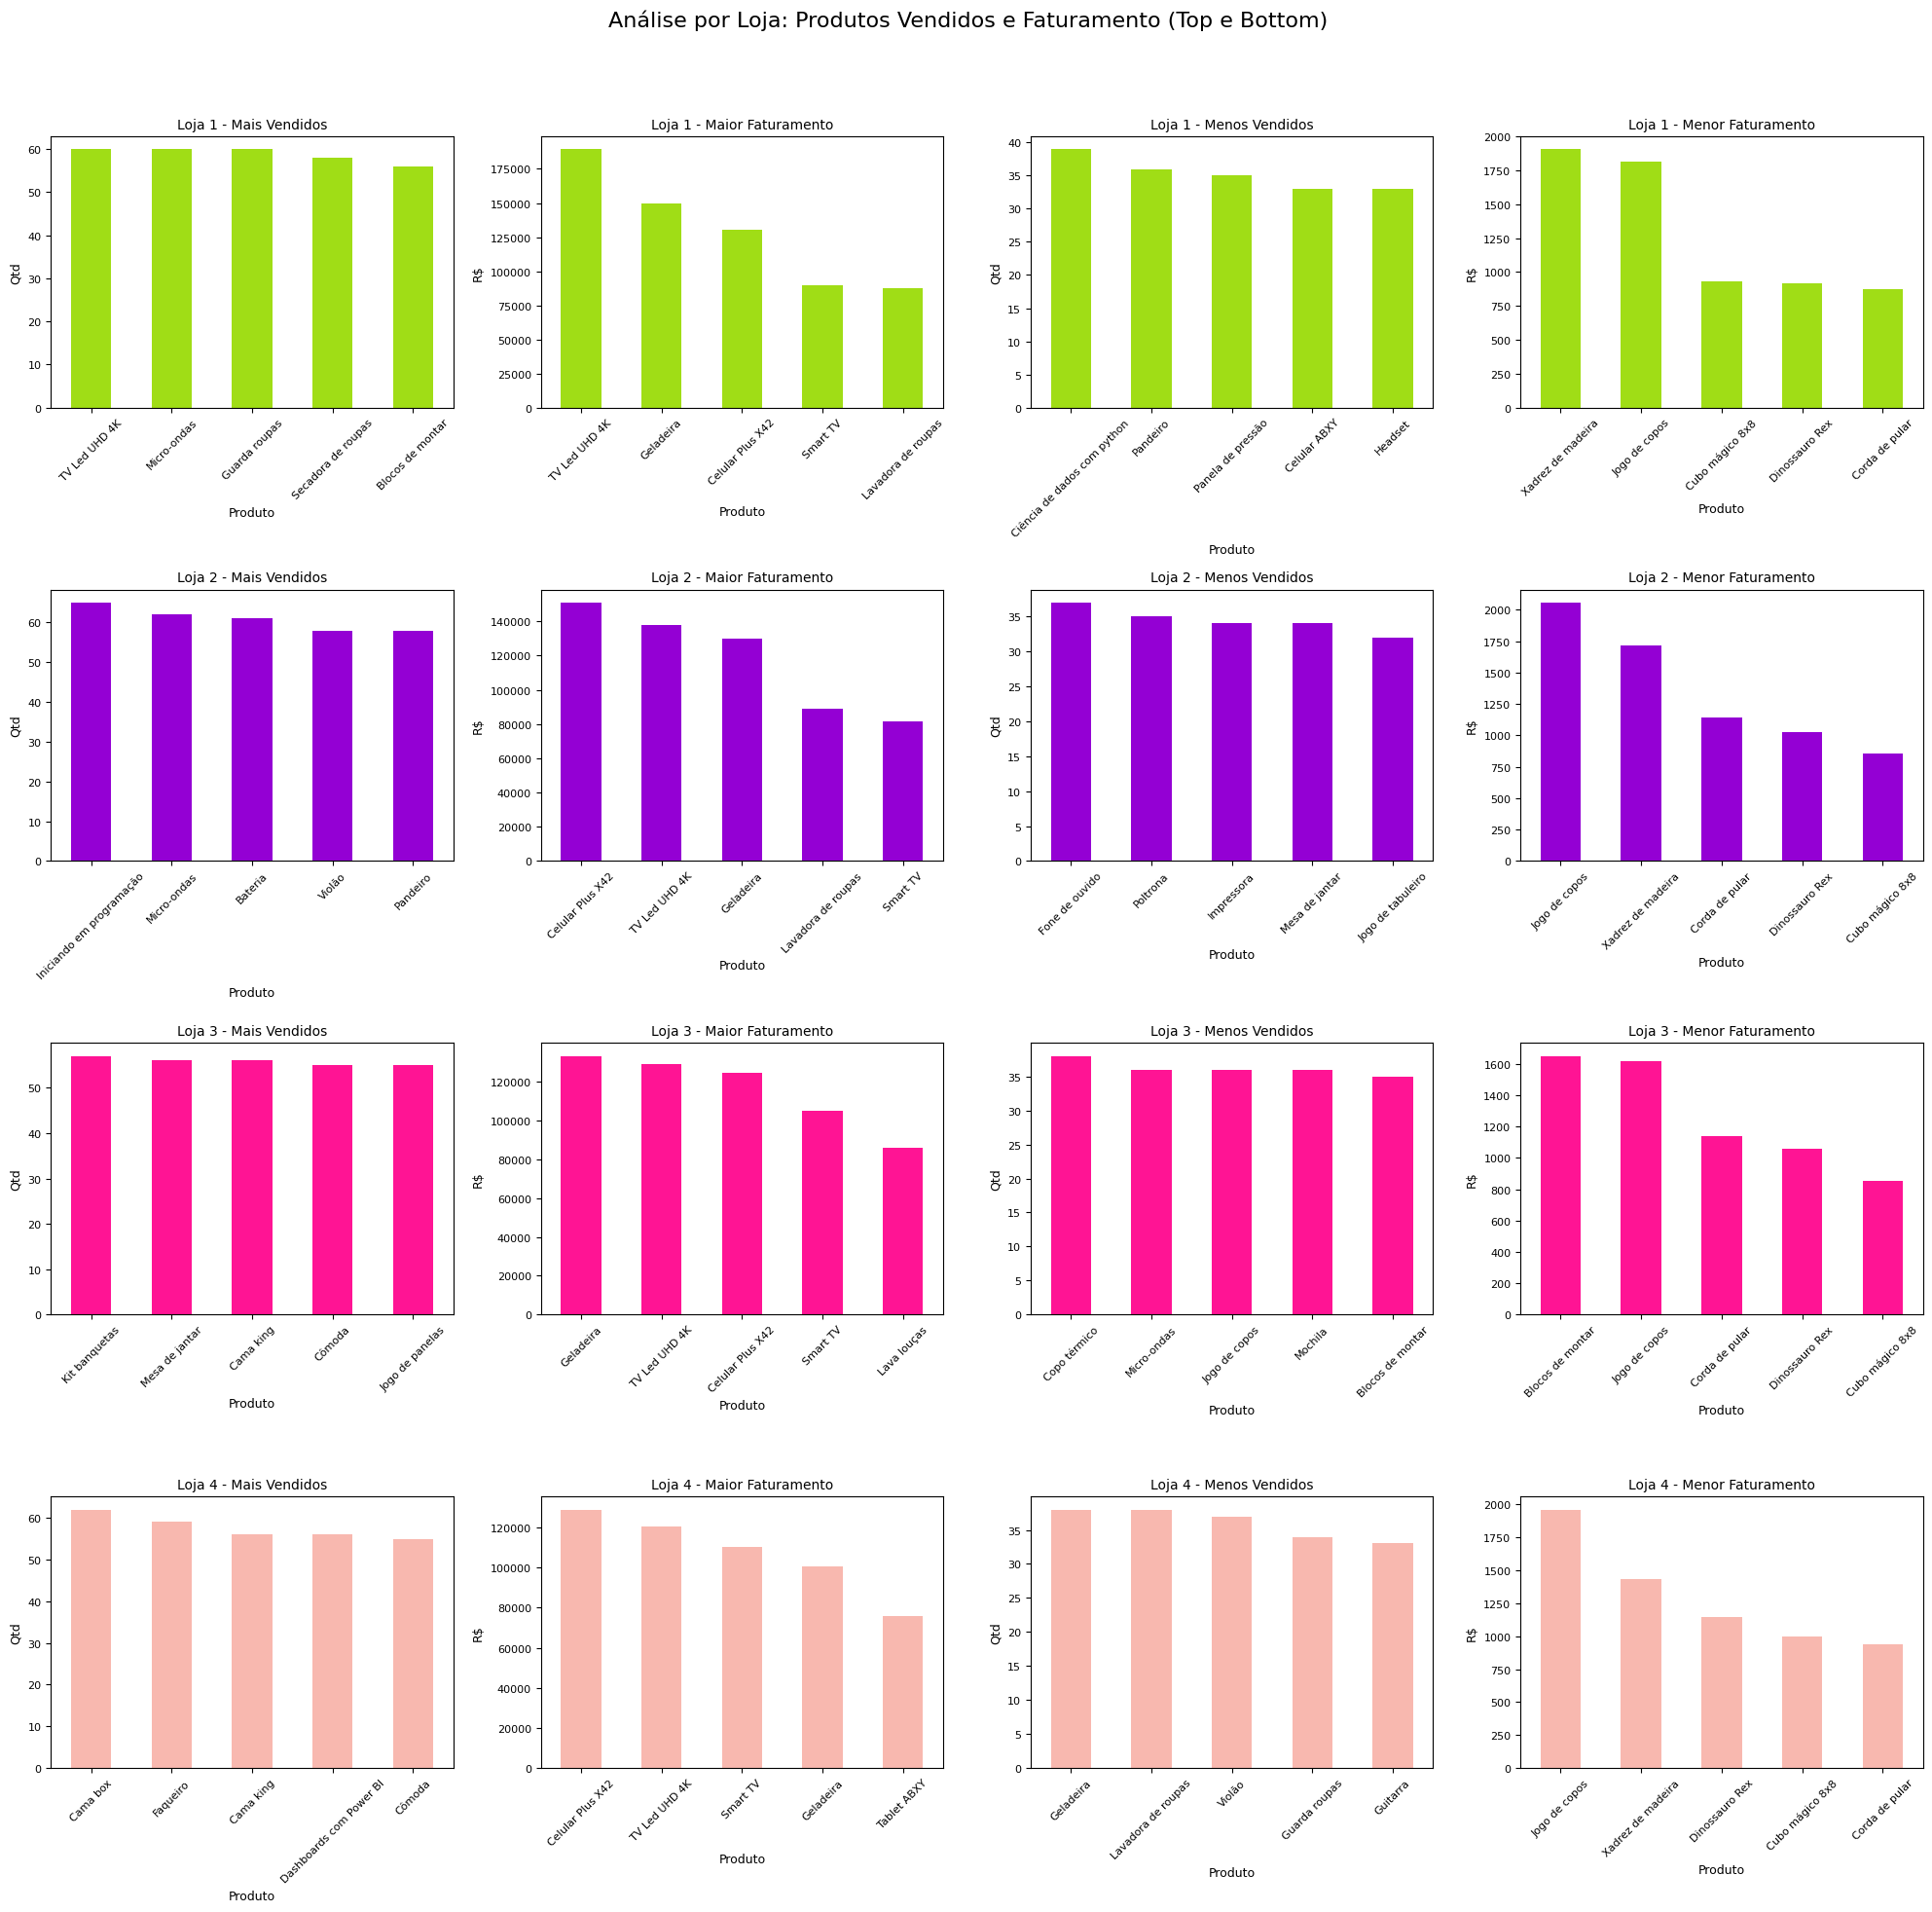

In [ ]:
# Definindo as cores
lojas = [loja1, loja2, loja3, loja4]
cores = ["#A0DD16", "#9400D4", "#Ff1494", "#F8B8AF"]

# Agrupamento por produto e calcula contagem e soma
def prepara_dados(loja):
    vendidos = loja.groupby('Produto')['Preço'].count().sort_values(ascending=False)
    faturamento = loja.groupby('Produto')['Preço'].sum().sort_values(ascending=False)
    return vendidos, faturamento

# Prepara os dados de todas as lojas
dados_lojas = []
for loja in lojas:
    vendidos, faturados = prepara_dados(loja)
    dados_lojas.append({
        'mais_vendidos': vendidos.head(5),
        'mais_faturados': faturados.head(5),
        'menos_vendidos': vendidos.tail(5),
        'menos_faturados': faturados.tail(5)
    })

# Títulos das colunas
titulos = ['Mais Vendidos', 'Maior Faturamento', 'Menos Vendidos', 'Menor Faturamento']
colunas = ['mais_vendidos', 'mais_faturados', 'menos_vendidos', 'menos_faturados']

# Cria os subplots: 4 linhas (lojas) x 4 colunas (métricas)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.suptitle('Análise por Loja: Produtos Vendidos e Faturamento (Top e Bottom)', fontsize=16)

# Plota o gráfico
for i, loja_dados in enumerate(dados_lojas):  # Linha → loja
    cor_loja = cores[i]  # Mesma cor para todos os gráficos da linha
    for j, metrica in enumerate(colunas):  # Coluna → tipo de análise
        ax = axes[i, j]
        loja_dados[metrica].plot(kind='bar', ax=ax, color=cor_loja)
        ax.set_title(f'Loja {i+1} - {titulos[j]}', fontsize=10)
        ax.set_ylabel('Qtd' if 'vendidos' in metrica else 'R$', fontsize=9)
        ax.set_xlabel('Produto', fontsize=9)
        ax.tick_params(axis='x', labelrotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)

# Ajusta layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 5. Frete Médio por Loja

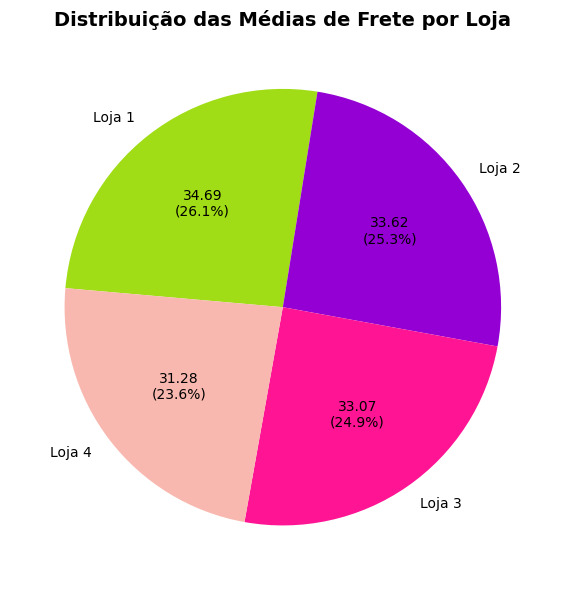

In [ ]:
# Cálculo do frete médio por loja
frete_dict = {
    "Loja 1": loja1['Frete'].mean(),
    "Loja 2": loja2['Frete'].mean(),
    "Loja 3": loja3['Frete'].mean(),
    "Loja 4": loja4['Frete'].mean()
}

# Ordem visua Começando do topo e seguindo no sentido horário
ordem_visual = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
frete = pd.Series(frete_dict)[ordem_visual]

# Cores na mesma ordem das lojas
cores = ["#A0DD16", "#9400D4", "#Ff1494", "#F8B8AF"]

# Função com quebra de linha no rótulo
def func_autopct(pct):
    total = frete.sum()
    valor = pct * total / 100
    return f'{valor:.2f}\n({pct:.1f}%)'

# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
frete.plot(
    kind='pie',
    autopct=func_autopct,
    colors=cores,
    startangle=175,         # Posição no eixo 175° para ficar no formato "x"
    counterclock=False,    # Sentido horário
    ylabel=''
)

plt.title('Distribuição das Médias de Frete por Loja', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()